# Stock Profits vs Month
## Monthly profits over 10 years. month (x-axis) (correlation between price and Month)

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import calendar
from scipy.stats import linregress
from pprint import pprint

# Import the API key
from api_keys import alpha_vantage_api_key, bls_api_key, fred_api_key


# https://cran.r-project.org/web/packages/eFRED/vignettes/FetchingDataFromFRED.html
# https://pypi.org/project/fredapi/
from fredapi import Fred

In [9]:
# Monthly Stock Profits dataFrame - 1
# Constants
stock_symbol = 'QQQ'
start_date = '2014-01-01'
end_date = '2019-12-31'
URL = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={stock_symbol}&apikey={alpha_vantage_api_key}&outputsize=full'


# Fetch stock data from alphavantage
response = requests.get(URL).json()

# Define an empty list to fetch the stock data
stock_data = []

for date, values in response['Time Series (Daily)'].items():
    stock_data.append({
        "Date": date,
        "Open": values['1. open'],
        "High": values['2. high'],
        "Low": values['3. low'],
        "Close": values['4. close'],
        "Volume": values['5. volume']
    })

# Conver List to dataFrame
stock_info_df = pd.DataFrame(stock_data)
stock_info_df = stock_info_df[(stock_info_df['Date'] >= start_date) & (stock_info_df['Date'] <= end_date)]

stock_info_df.reset_index()
stock_info_df['Date'] = pd.to_datetime(stock_info_df['Date'])
stock_info_df['Open'] = stock_info_df['Open'].astype(float)
stock_info_df['Close'] = stock_info_df['Close'].astype(float)

stock_info_df

,Date,Open,High,Low,Close,Volume
1086,2019-12-31,211.62,212.7600,211.2000,212.61,18201585
1087,2019-12-30,213.50,213.6300,211.1600,212.21,21829913
1088,2019-12-27,214.54,214.5600,213.0400,213.61,18142239
1089,2019-12-26,212.26,213.8100,212.2300,213.79,17159310
1090,2019-12-24,212.00,212.0900,211.4400,211.92,7089020
...,...,...,...,...,...,...
2591,2014-01-08,87.11,87.5500,86.9450,87.31,27197400
2592,2014-01-07,86.70,87.2500,86.5600,87.12,25860600
2593,2014-01-06,86.65,86.7600,86.0000,86.32,32073100
2594,2014-01-03,87.27,87.3500,86.6200,86.64,35723700


In [10]:
# Monthly Stock Profits dataFrame - 2
# Date, Month Column creation by using Date
stock_info_df['Year'] = stock_info_df['Date'].dt.year
stock_info_df['Month_Number'] = stock_info_df['Date'].dt.month

# Open price for each Year, Month & Close price for each Year, Month
monthly_data = stock_info_df.groupby(['Year', 'Month_Number'])
first_open = monthly_data['Open'].first().reset_index()
last_close = monthly_data['Close'].last().reset_index()

stock_info_df

,Date,Open,High,Low,Close,Volume,Year,Month_Number
1086,2019-12-31,211.62,212.7600,211.2000,212.61,18201585,2019,12
1087,2019-12-30,213.50,213.6300,211.1600,212.21,21829913,2019,12
1088,2019-12-27,214.54,214.5600,213.0400,213.61,18142239,2019,12
1089,2019-12-26,212.26,213.8100,212.2300,213.79,17159310,2019,12
1090,2019-12-24,212.00,212.0900,211.4400,211.92,7089020,2019,12
...,...,...,...,...,...,...,...,...
2591,2014-01-08,87.11,87.5500,86.9450,87.31,27197400,2014,1
2592,2014-01-07,86.70,87.2500,86.5600,87.12,25860600,2014,1
2593,2014-01-06,86.65,86.7600,86.0000,86.32,32073100,2014,1
2594,2014-01-03,87.27,87.3500,86.6200,86.64,35723700,2014,1


In [15]:
# Monthly Stock Profits dataFrame - 3 (final)

monthly_profit = last_close['Close'] - first_open['Open']

# dataFrame creation
monthly_profit_df = pd.DataFrame({
                                    'Year': first_open['Year'],
                                    'Month_Number': first_open['Month_Number'],
                                    'Monthly_Profit': monthly_profit
                                })

# Generate month numbers (1-12)
month_numbers = list(range(1, 13))

# Use list comprehension to map month numbers to month names
month_names = [calendar.month_name[month] for month in month_numbers]

# Create the DataFrame
month_df = pd.DataFrame({
                            'Month_Number': month_numbers,
                            'Month': month_names
                        })

# Merge the DataFrames on 'Month' from monthly_profit_df and 'Month Number' from month_df
monthly_profit_merge_df = pd.merge(monthly_profit_df, month_df, left_on='Month_Number', right_on='Month_Number', how='left')

monthly_profit_final_df = monthly_profit_merge_df[["Year", "Month", "Month_Number", "Monthly_Profit"]]
monthly_profit_final_df["Year"] = monthly_profit_final_df["Year"].astype('str')

monthly_profit_final_df

,Year,Month,Month_Number,Monthly_Profit
0,2014,January,1,1.73
1,2014,February,2,-6.12
2,2014,March,3,1.94
3,2014,April,4,2.42
4,2014,May,5,-3.68
...,...,...,...,...
67,2019,August,8,1.22
68,2019,September,9,-2.14
69,2019,October,10,-10.29
70,2019,November,11,-6.65


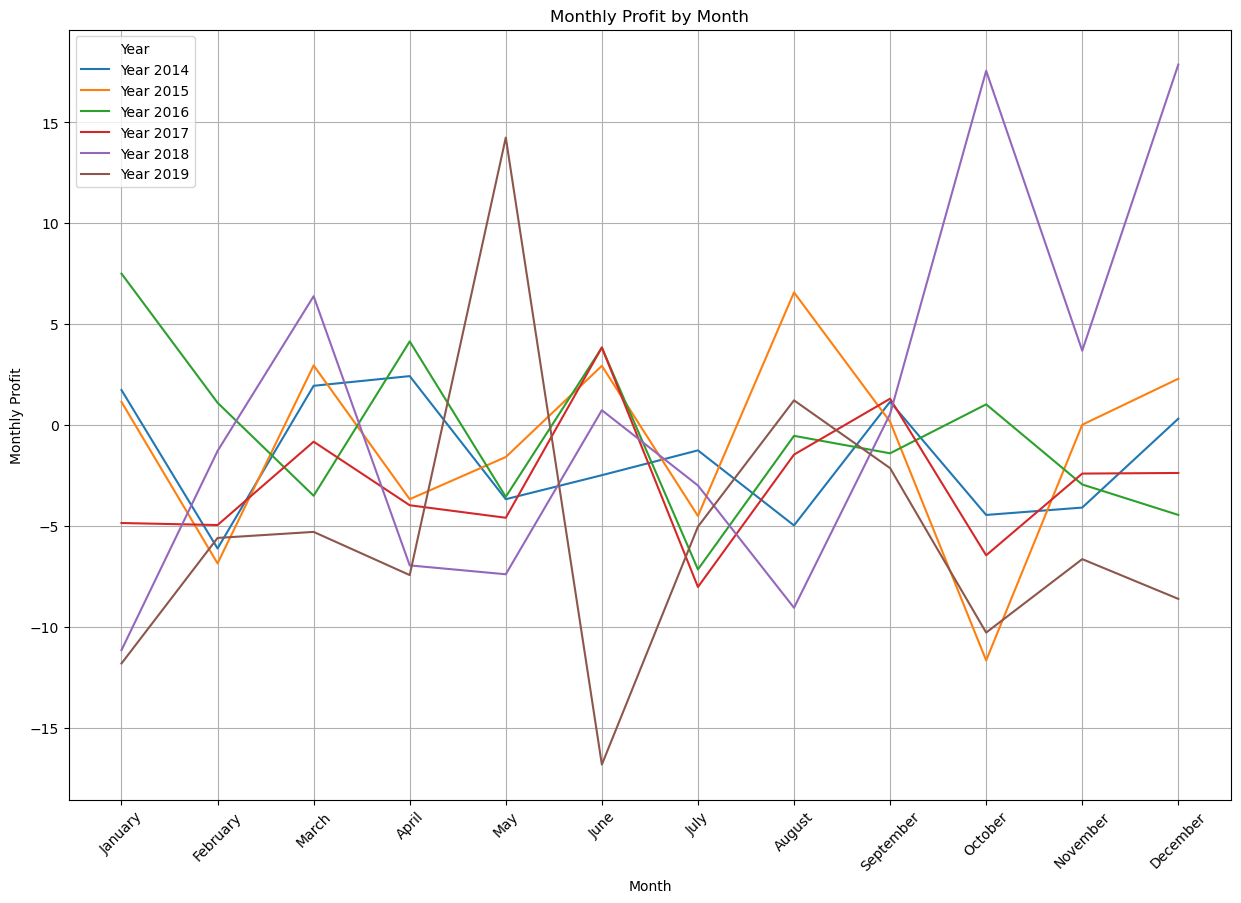

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))

# line plot for each year
years = monthly_profit_final_df['Year'].unique()

for year in years:
    filtered_df = monthly_profit_final_df.loc[monthly_profit_final_df['Year'] == year]
    plt.plot(filtered_df['Month'], filtered_df['Monthly_Profit'], label=f'Year {year}')

filtered_df

# setting Graph
ax.set_xlabel('Month')
ax.set_ylabel('Monthly Profit')
ax.set_title('Monthly Profit by Month')
ax.legend(title='Year')
plt.xticks(rotation=45)
ax.grid(True)

plt.show()

In [17]:
# Increase Probability for each Month?

# Add a new column to track positive profits
monthly_profit_final_df['Positive'] = monthly_profit_final_df['Monthly_Profit'] > 0

grouped = monthly_profit_final_df.groupby(['Month_Number', 'Month'])
total_counts = grouped.size()
positive_counts = grouped['Positive'].sum()

# Combine the results into a DataFrame
monthly_positive_counts = pd.DataFrame({
                                        'Positive_Count': positive_counts,
                                        'Total_Count': total_counts
                                        }).reset_index()

# Calculate the Probability of positive monthly profits
monthly_positive_counts['Positive_Prob'] = monthly_positive_counts['Positive_Count'] / monthly_positive_counts['Total_Count'] * 100
monthly_positive_counts['Positive_Prob'] = monthly_positive_counts['Positive_Prob'].round(2)


monthly_positive_counts


,Month_Number,Month,Positive_Count,Total_Count,Positive_Prob
0,1,January,3,6,50.00
1,2,February,1,6,16.67
2,3,March,3,6,50.00
3,4,April,2,6,33.33
4,5,May,1,6,16.67
5,6,June,4,6,66.67
6,7,July,0,6,0.00
7,8,August,2,6,33.33
8,9,September,4,6,66.67
9,10,October,2,6,33.33


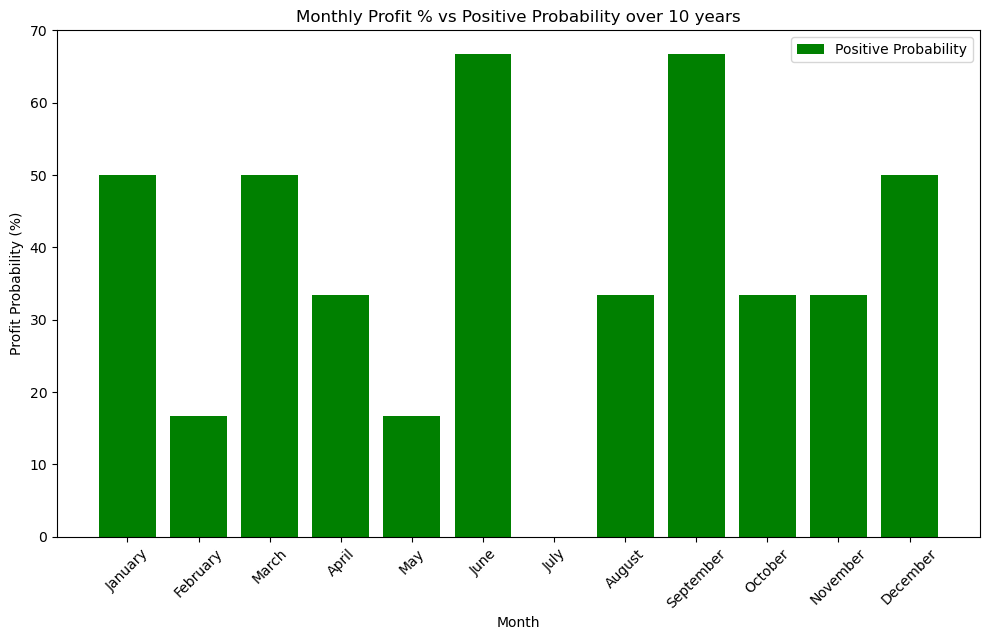

In [31]:
plt.figure(figsize=(10,6))

plt.bar(monthly_positive_counts["Month"], monthly_positive_counts["Positive_Prob"], color='green', label='Positive Probability')

plt.xlabel('Month')
plt.ylabel('Profit Probability (%)')
plt.title('Monthly Profit % vs Positive Probability over 10 years')
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


